# <div style="text-align: center;">Covid Cases</div>

The COVID-19 pandemic has affected all aspects of our lives in unprecedented ways. As a data enthusiast, I wanted to understand how this disease has spread around the world, how it has impacted different regions and countries, and how we can use data to better understand and mitigate its effects. To this end, I have collected a dataset that contains information about COVID-19 cases and deaths in different countries and regions over time. This dataset includes information about the location, date, and severity of cases, as well as other relevant variables such as demographics, health system capacity, and public policy responses. By analyzing this data and visualizing the patterns and trends, I hope to gain insights into the dynamics of this pandemic and contribute to the global efforts to control it. This question is related to my project because I need to know how to manipulate and visualize the data using Python, which is a powerful and flexible programming language that can help me derive meaningful insights from complex datasets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("covid_19_clean_complete.csv")

In [3]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [4]:
df.columns 

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [5]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


# Drop any rows with missing values

In [6]:
df.dropna(inplace=True)

# Convert the date column to a datetime object

In [7]:
df["Date"] = pd.to_datetime(df["Date"])

# Renaming the columns for easier referencing

In [8]:
df.rename(columns={
    "Date": "date",
    "Province/State": "state",
    "Country/Region": "country",
    "Confirmed": "confirmed",
    "Deaths": "deaths",
    "Recovered": "recovered",
}, inplace=True)

# Set the date column as the index

In [9]:
df.set_index("date", inplace=True)

# The total number of confirmed cases, deaths, and recoveries

In [10]:
total_confirmed = df["confirmed"].max()
total_deaths = df["deaths"].max()
total_recovered = df["recovered"].max()

# The case fatality rate and recovery rate calculation

In [11]:
case_fatality_rate = (total_deaths / total_confirmed) * 100
recovery_rate = (total_recovered / total_confirmed) * 100

# Results

In [12]:
print(f"Total confirmed cases: {total_confirmed}")
print(f"Total deaths: {total_deaths}")
print(f"Total recoveries: {total_recovered}")
print(f"Case fatality rate: {case_fatality_rate:.2f}%")
print(f"Recovery rate: {recovery_rate:.2f}%")

Total confirmed cases: 68135
Total deaths: 5667
Total recoveries: 64435
Case fatality rate: 8.32%
Recovery rate: 94.57%


# Bar chart to show the number of confirmed cases by country
The following bar chart shows the total confirmed cases for 8 different countries. You can see that the number of confirmed cases is always high followed by a high percentage of recovery, with an unfortunate small percentage resulting in death. From this we can see that majority of the people recover.

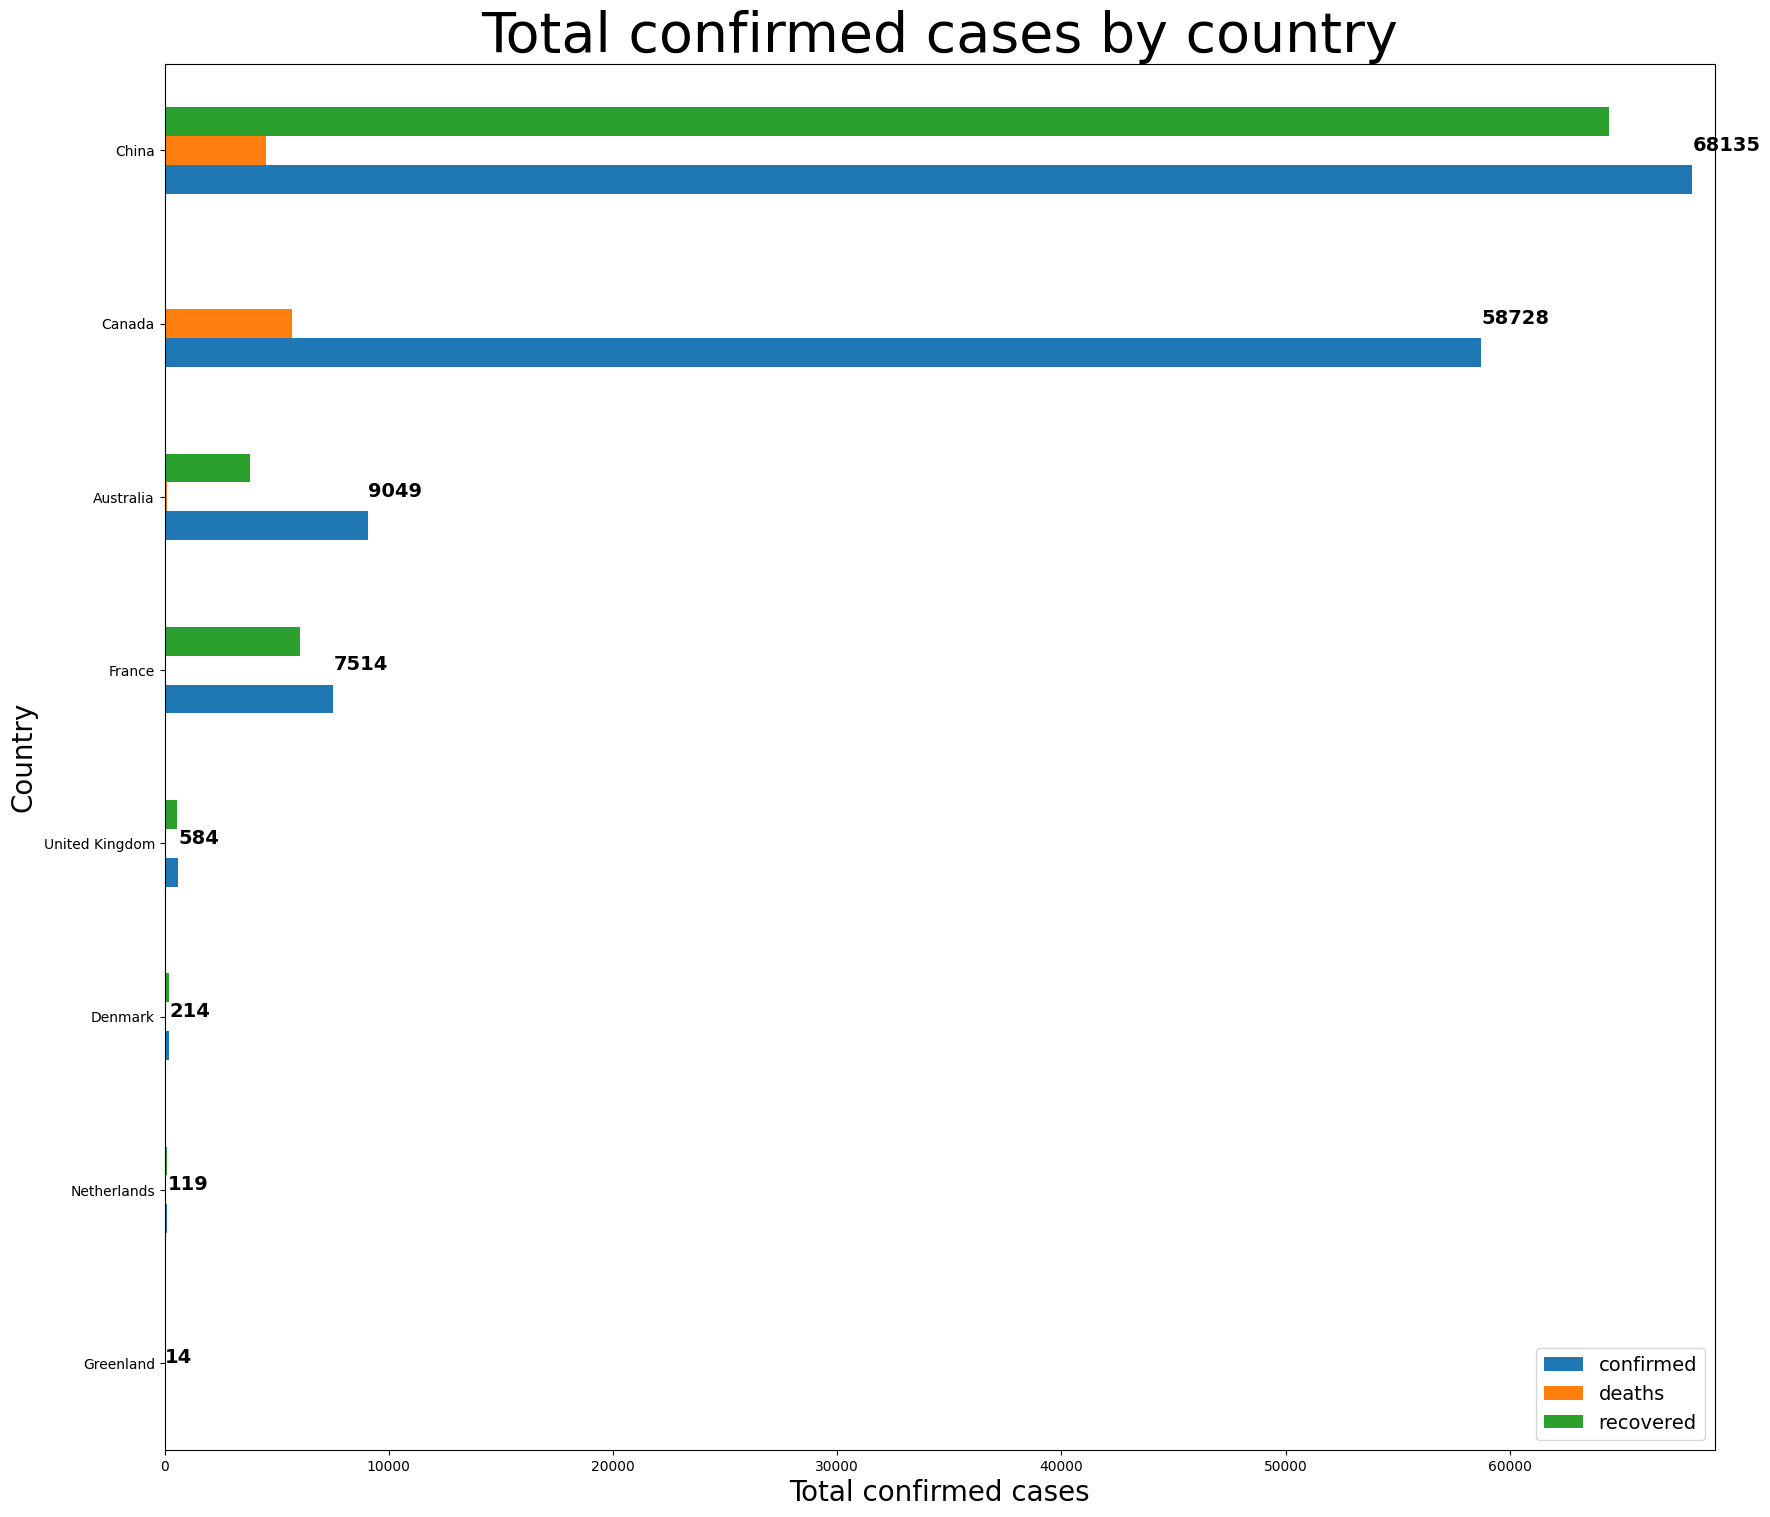

In [13]:
# Create a bar chart to show the number of confirmed cases by country
grouped_by_max = df.groupby("country")[["confirmed", "deaths", "recovered"]].max()
grouped_by_max.sort_values(by="confirmed", ascending=True, inplace=True)

ax = grouped_by_max.plot(kind="barh", figsize=(20, 18))
ax.set_title("Total confirmed cases by country", fontsize=40)
ax.set_xlabel("Total confirmed cases", fontsize=20)
ax.set_ylabel("Country", fontsize=20)

# Set the x-axis limits
plt.xlim(0, grouped_by_max["confirmed"].max()+1000)

# Add labels to the bars
for i, v in enumerate(grouped_by_max["confirmed"]):
    ax.text(v+10, i, str(v), color='black', fontweight='bold', fontsize=14)
    
plt.legend(loc='lower right', fontsize=14)
plt.show()

# Scatter plot to show the relationship between confirmed cases and deaths
The scatter plot provides valuable insights into the relationship between the number of confirmed cases and the causes of death. The data indicates a strong positive correlation, meaning that as the number of confirmed cases increases, so do the number of deaths. This highlights the significant impact of the virus on public health and emphasizes the importance of effective preventative measures to mitigate the spread of the virus.

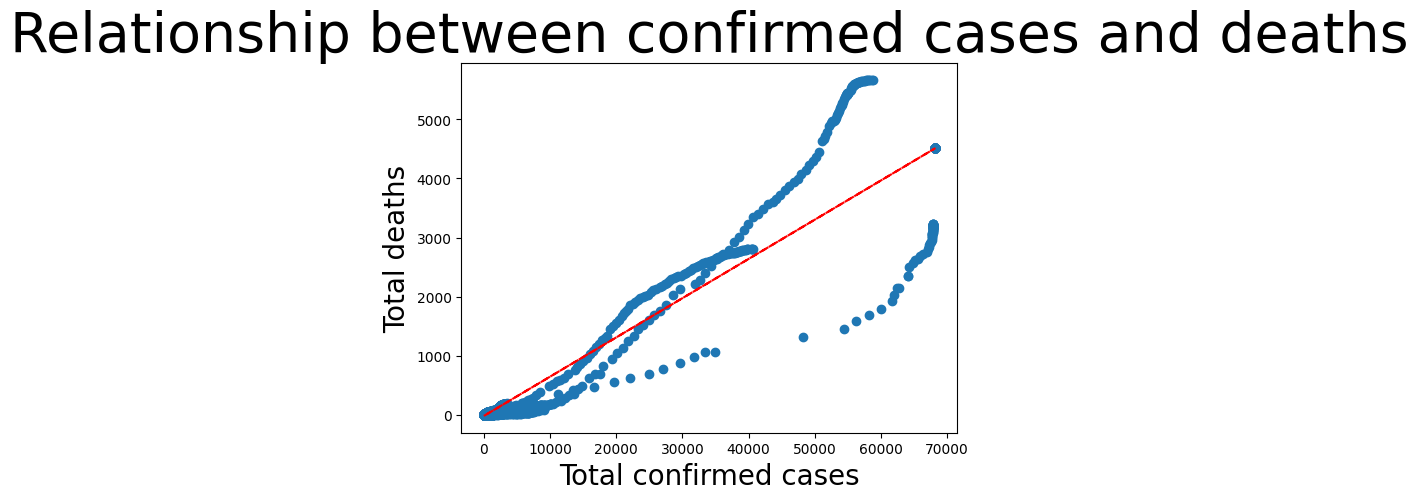

In [14]:
# create a scatter plot of confirmed cases vs deaths
fig, ax = plt.subplots()
fig.figsize=(20, 18)
ax.scatter(df["confirmed"], df["deaths"])
plt.title("Relationship between confirmed cases and deaths", fontsize=40)
plt.xlabel("Total confirmed cases", fontsize=20)
plt.ylabel("Total deaths", fontsize=20)

# add regression line
z = np.polyfit(df["confirmed"], df["deaths"], 1)
p = np.poly1d(z)
ax.plot(df["confirmed"], p(df["confirmed"]), "r--")

# Set x-ticks to go up in every 10,000
plt.xticks(np.arange(0, 80000, 10000), fontsize=10)

plt.show()

# Grouping the data by country and sum the confirmed, deaths, and recovered cases


In [15]:
grouped = df.groupby("country")[["confirmed", "deaths", "recovered"]].max()

# Stacked bar chart to show the distribution of cases by country
The stacked bar graph shows that a sizable proportion of individuals in each of the nations shown have contracted the virus. There are, nevertheless, a sizable number of people who have recovered from the illness. The number of fatalities, in contrast, seems to be lower overall. Overall, the graphic offers a clear visual picture of the breakdown of cases by nation, illuminating the pandemic's worldwide scope.

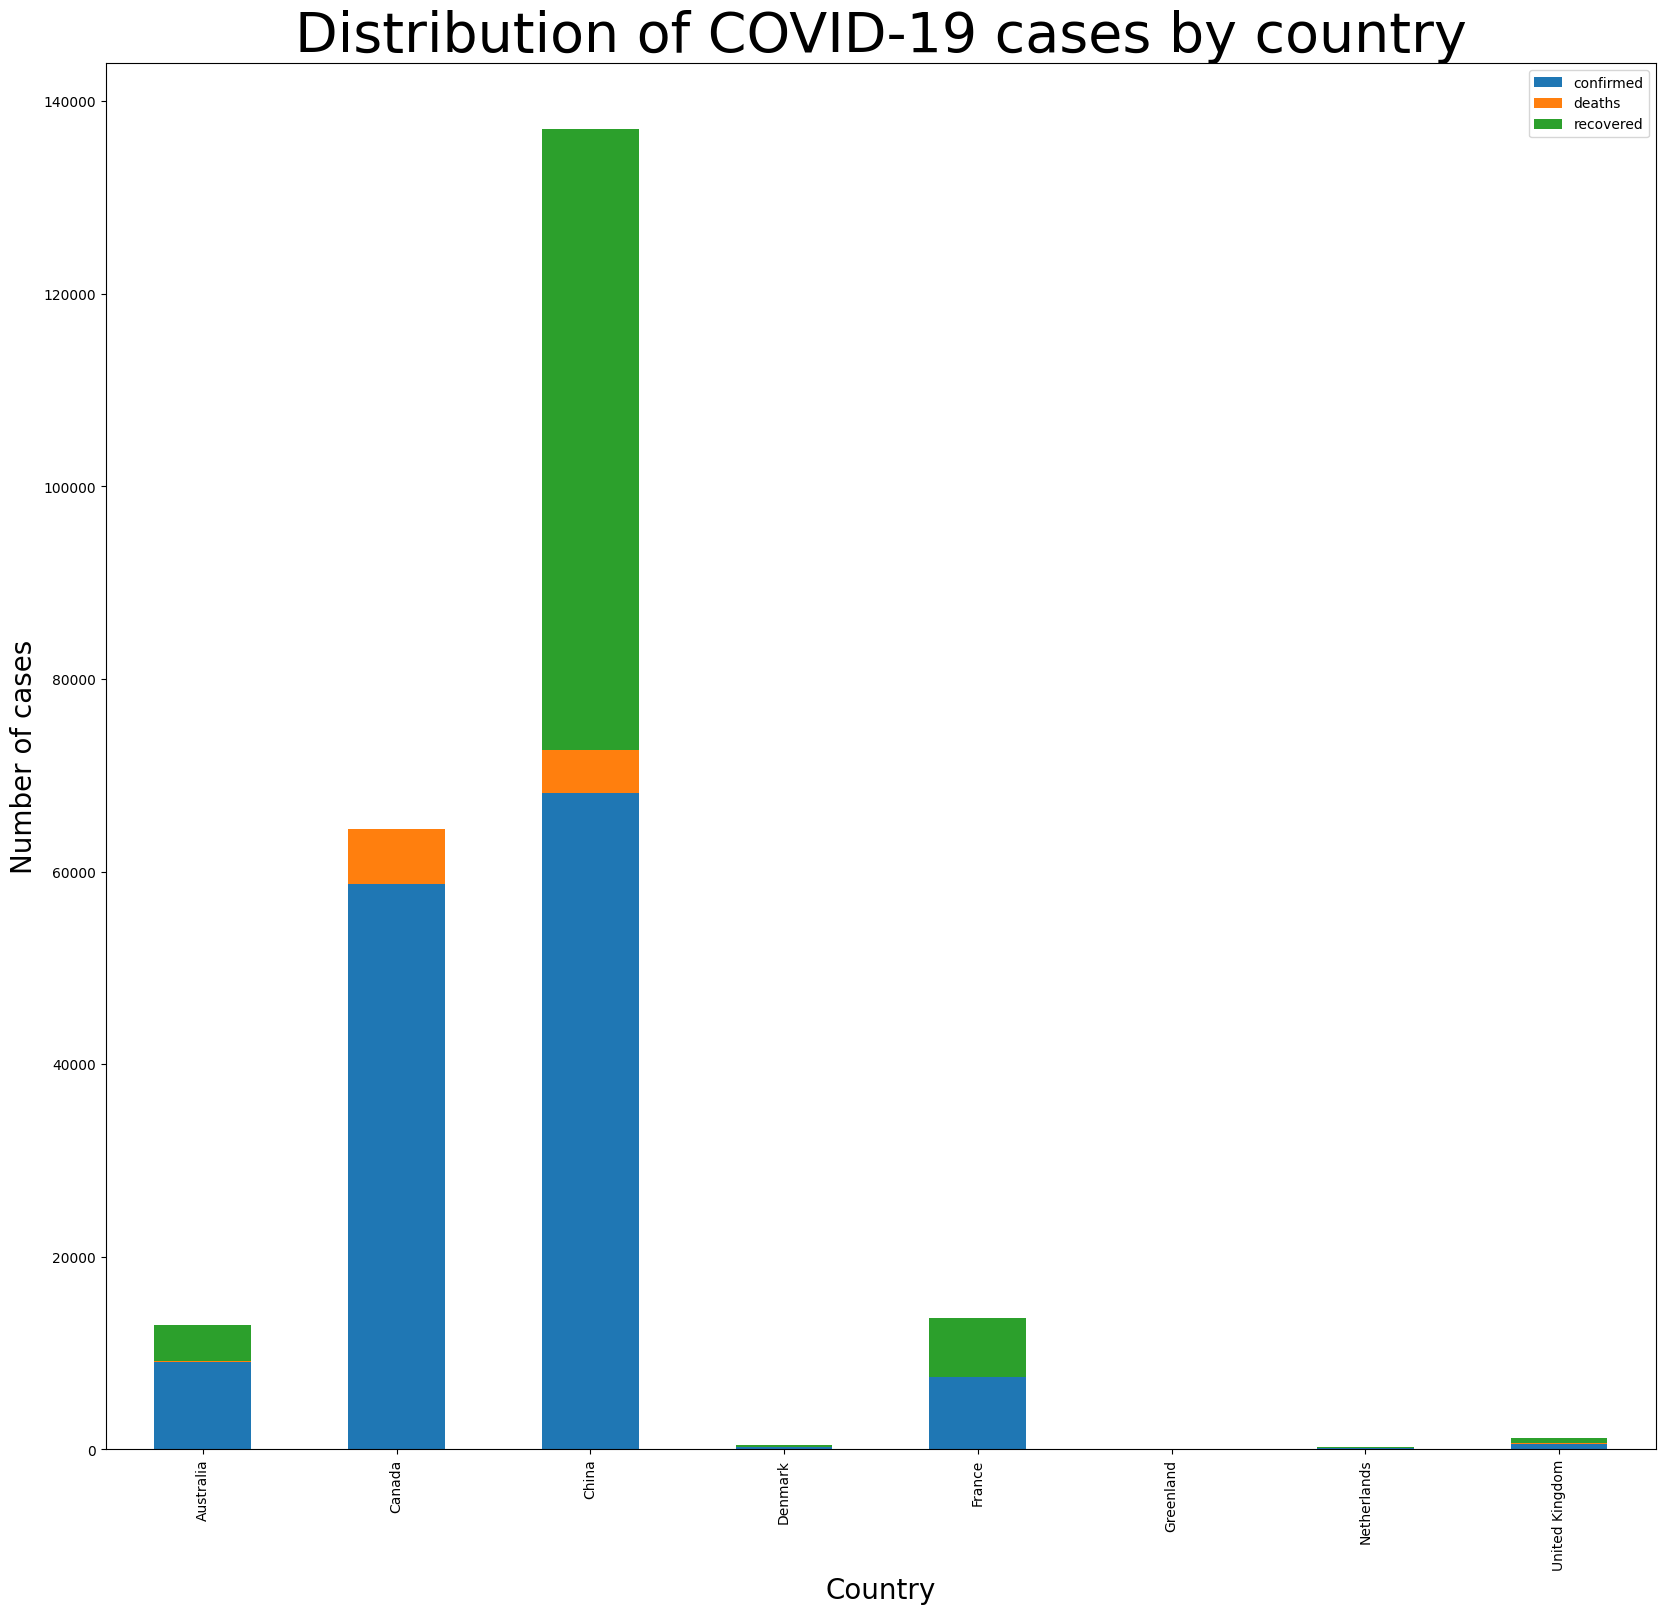

In [16]:
grouped.plot(kind="bar", stacked=True, figsize=(20, 18))
plt.title("Distribution of COVID-19 cases by country", fontsize=40)
plt.xlabel("Country", fontsize=20)
plt.ylabel("Number of cases", fontsize=20)
plt.show()

# Top 5 Countries with Confirmed Cases
The chart shows the top 5 countries that have been most affected by the COVID-19 pandemic. China has the highest number of confirmed cases, followed by canada, Australia and France. The number of confirmed cases decreases gradually from the top to the bottom of the chart. This chart highlights the severity of the pandemic and the global impact it has had on many countries, escpailly those with higher population.

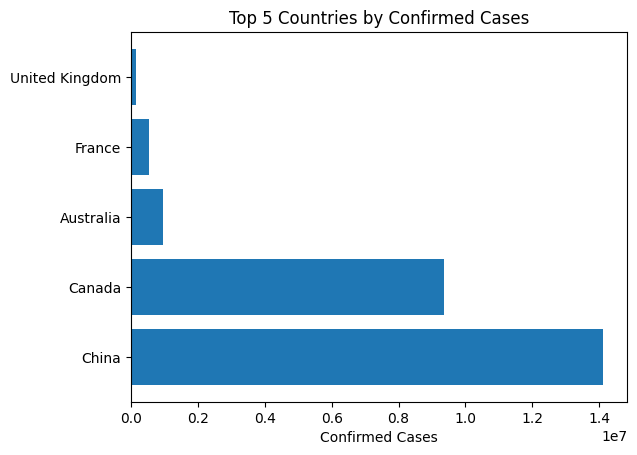

In [17]:
# Group the data by country and sum up the confirmed, deaths, and recovered cases
country_cases = df.groupby('country')[["confirmed", "deaths", "recovered"]].sum().reset_index()

# Sort the data by confirmed cases in descending order
country_cases = country_cases.sort_values(by='confirmed', ascending=False)

# Create a horizontal bar chart to visualize the top 10 countries by confirmed cases
plt.barh(country_cases['country'][:5], country_cases['confirmed'][:5], align='center')
plt.xlabel('Confirmed Cases')
plt.title('Top 5 Countries by Confirmed Cases')

plt.show()

In conclusion, COVID-19 has had a profound impact on people around the world. The analysis of the dataset has shown the scale and severity of the pandemic, with confirmed cases, deaths, and recoveries occurring on an unprecedented level. The dataset highlights the need for continued efforts to contain the spread of the virus. The impacts of the pandemic were far-reaching, affecting not only individuals who have contracted the virus but also their families, communities, and society as a whole. 